In [1]:
import kwant

C:\Users\USER\anaconda3\lib\site-packages\kwant\solvers\default.py:16: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  warnings.warn("MUMPS is not available, "


In [2]:
from matplotlib import pyplot
a=1
t=1.0
W=10
L=30
L_well=10
    
lat = kwant.lattice.square(a)

syst = kwant.Builder()


In [3]:
# lets define the potential

In [4]:
def potential(site, pot):
        (x, y) = site.pos
        if (L - L_well) / 2 < x < (L + L_well) / 2:
            return pot
        else:
            return 0

def onsite(site, pot):
        return 4 * t + potential(site, pot)


In [34]:
syst[(lat(x, y) for x in range(L) for y in range(W))] = onsite
syst[lat.neighbors()] = -t

In [35]:
# attach lead

In [36]:
def plot_conductance(syst, energy, welldepths):

    # Compute conductance
    t_coef = []
    for welldepth in welldepths:
        smatrix = kwant.smatrix(syst, energy, params=dict(pot= -welldepth))
        t_coef.append(smatrix.transmission(1, 0))
    
    
    
    
    pyplot.figure()
    pyplot.plot(welldepths,t_coef)
    pyplot.xlabel("well depth [t]")
    pyplot.ylabel("conductance [e^2/h]")
    pyplot.title(energy)
    pyplot.show()


In [37]:
sys=syst.finalized()

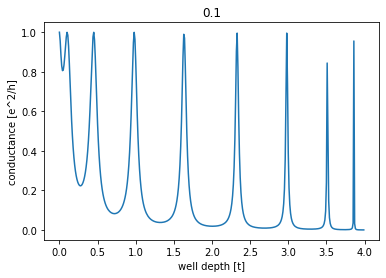

In [29]:
plot_conductance(sys, energy=0.1,welldepths=[0.01 * i for i in range(400)])


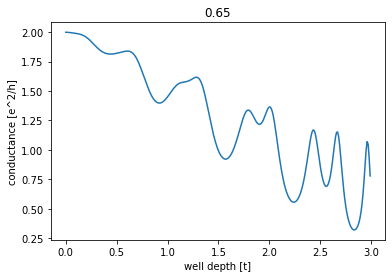

In [27]:
plot_conductance(sys, energy= 0.65,welldepths=[0.01 * i for i in range(300)])

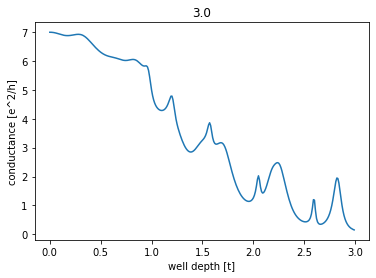

In [28]:
plot_conductance(sys, energy= 3.0,welldepths=[0.01 * i for i in range(300)])

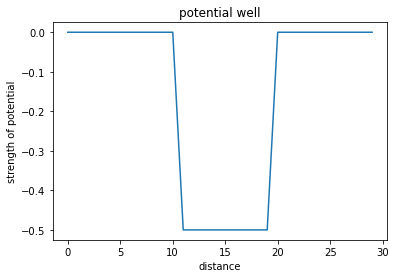

In [17]:
xaxis= []
yaxis= []
for x in range(30):
    xaxis.append(x)
    if 10 < x < 20:
        y= -0.5
    else:
        y=0
    yaxis.append(y)
    
pyplot.plot(xaxis,yaxis)
pyplot.title("potential well")
pyplot.xlabel("distance")
pyplot.ylabel("strength of potential")
pyplot.show()

In [38]:
kwant.plotter.bands(sys)

TypeError: Expecting an instance of InfiniteSystem.